# Supervised Learning

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the dataset to the python environment.

In [2]:
# Read the data to Python environment
data = pd.read_excel("iris.xls")

In [3]:
# Displaying five random rows
data.sample(5)

,SL,SW,PL,PW,Classification
44,5.1,3.8,1.9,0.4,Iris-setosa
76,6.8,2.8,4.8,1.4,Iris-versicolor
128,6.4,2.8,5.6,2.1,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
39,NaN,3.4,1.5,0.2,Iris-setosa


In [4]:
# Checking the shape of the data set
print('The no.of Rows and Columns in the data set is:', data.shape)

The no.of Rows and Columns in the data set is: (150, 5)


The Iris Dataset contains four features (length and width of Sepals and Petals) of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

Following are explanations of the columns:

SL = Sepal length in cm
SW = Sepal width in cm
PL = Petal length in cm
PW = Petal width in cm
Classification(Name of species):
Iris Setosa
Iris Versicolour
Iris Virginica

# 2. Do necessary pre-processing steps.

In [5]:
# Displaying the column names
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [6]:
# Changing the column names for easy understanding (pre-processing step)
data.columns = ['Sepal_length','Sepal_width','Petal_length','Petal_width', 'Classification']
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Checking for Null values in the data set (pre-processing step)
data.isnull().sum()


Sepal_length      7
Sepal_width       6
Petal_length      6
Petal_width       0
Classification    0
dtype: int64

Missing values present in Sepal_length, Sepal _width and Petal_length columns

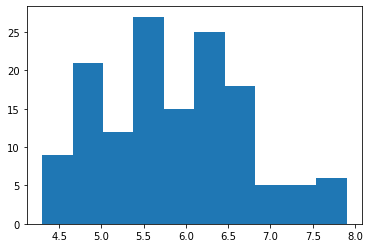

In [8]:
# 1. Handling the missing values in Sepal_length column
plt.hist('Sepal_length',data = data)
plt.show()

In [9]:
# We see that the data is not normally distributed, it skewed to right.
# So, we fill the missing values with median using fillna() method
data['Sepal_length'] = data['Sepal_length'].fillna(data['Sepal_length'].median())

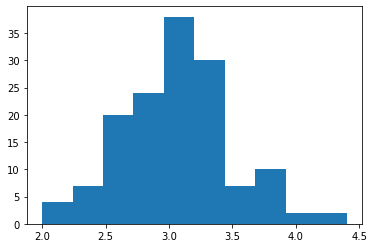

In [10]:
# 2. Handling the missing values in Sepal _width column
plt.hist('Sepal_width',data = data)
plt.show()

In [11]:
# We see that the data is not normally distributed, it skewed to right.
# So, we fill the missing values with median using fillna() method
data['Sepal_width'] = data['Sepal_width'].fillna(data['Sepal_width'].median())

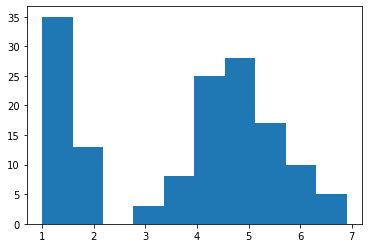

In [12]:
# 3. Handling the missing values in Petal_length column
plt.hist('Petal_length',data = data)
plt.show()

In [13]:
# We see that the data is not normally distributed, it skewed to left.
# So, we fill the missing values with median using fillna() method
data['Petal_length'] = data['Petal_length'].fillna(data['Petal_length'].median())

In [14]:
# Re- Checking for Null values in the data set
data.isnull().sum()

Sepal_length      0
Sepal_width       0
Petal_length      0
Petal_width       0
Classification    0
dtype: int64

We sucessfully handled all the missing values in the data set.

In [15]:
# Descriptive statistics for each column
data.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From the above table we can find the Total count, Mean, Standard Deviation, Min & Max value and percentile of each column.

In [16]:
# Displaying the statistical summary of the categorical columns in dataset.
data.describe(include = object)

,Classification
count,150
unique,3
top,Iris-setosa
freq,50


There is only one categorical column in dataset named 'Classification'.
And there are three unique values presnt in the column.

In [17]:
# Checking for outliers (pre-processing step)

In [18]:
# Displaying the data types 
data.dtypes

Sepal_length      float64
Sepal_width       float64
Petal_length      float64
Petal_width       float64
Classification     object
dtype: object

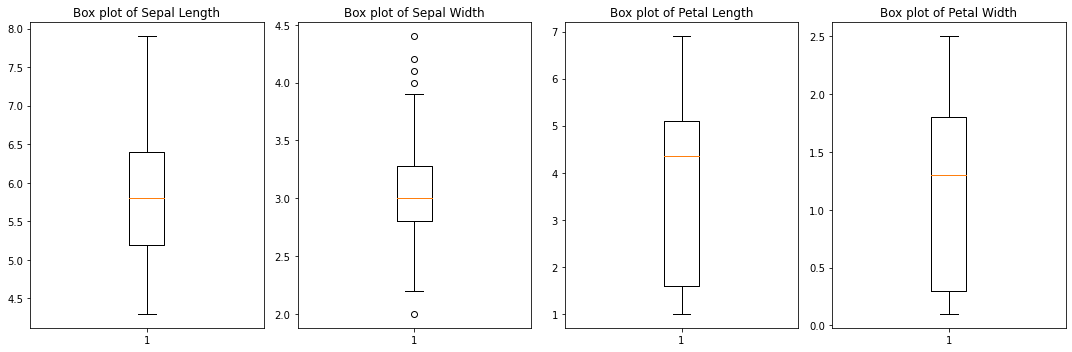

In [19]:
# We now plot box plot for all the numerical columns to find outliers, if any.
plt.figure(figsize = (15,5))

plt.subplot(1,4,1)
plt.boxplot(data['Sepal_length'])
plt.title('Box plot of Sepal Length')


plt.subplot(1,4,2)
plt.boxplot(data['Sepal_width'])
plt.title('Box plot of Sepal Width')

plt.subplot(1,4,3)
plt.boxplot(data['Petal_length'])
plt.title('Box plot of Petal Length')

plt.subplot(1,4,4)
plt.boxplot(data['Petal_width'])
plt.title('Box plot of Petal Width')

plt.tight_layout()
plt.show()

In [20]:
# Checking the outliers in Sepal_width column
# Checking the statistical summary of the Sepal_width column
data['Sepal_width'].describe()

count    150.000000
mean       3.047333
std        0.421995
min        2.000000
25%        2.800000
50%        3.000000
75%        3.275000
max        4.400000
Name: Sepal_width, dtype: float64

There are different ways to handle the outlier:

We may delete outlier values if it is by some data entry error.
We may impute outlier using mean, median, or zero and thus there is no loss of data.
Quantile based flooring and capping.
Another option is treating the outlier separately in the statistical model. So, we treat them in separate groups (with outlier, deleting outlier, impute outlier) and build individual model for each group and then check the output and find out what is the best way to handle the outlier.

In [21]:
# Handling the outlier with the help of Inter Quartile Range(IQR)

In [22]:
# Finding the respective value for the percentiles at 25, 50 and 75.
Q1 = np.percentile(data['Sepal_width'], 25, interpolation = 'midpoint')
Q2 = np.percentile(data['Sepal_width'], 50, interpolation = 'midpoint')
Q3 = np.percentile(data['Sepal_width'], 75, interpolation = 'midpoint')

# Calculating the IQR
IQR = Q3 - Q1

# Finding the lower and upper limit
low_limit = Q1 - 1.5 * IQR
upp_limit = Q3 + 1.5 * IQR

# Now we will find out the outliers by considering that all values below lower and all values above upper limits as outliers.

outlier = []
for i in data['Sepal_width']:
    if ((i < low_limit) or ( i > upp_limit )):
        outlier.append(i)

print('The no.of outliers present in the Sepal_width column:',len(outlier))
print('The outliers present in the Sepal_width column:',outlier)

The no.of outliers present in the Sepal_width column: 5
The outliers present in the Sepal_width column: [4.0, 4.4, 4.1, 4.2, 2.0]


Since we don't consider it as data entry errors, we will not delete these outliers.

However, we need to reduce the presence of outlier for our Machine Learning models to perform better.

We will impute the outliers with median value of Sepal_width column because median is not affected by the outliers.

In [23]:
median_value = data['Sepal_width'].median() 
data['Sepal_width'] = np.where(data['Sepal_width'] > upp_limit , median_value , np.where(data['Sepal_width'] < low_limit, median_value, data['Sepal_width']))

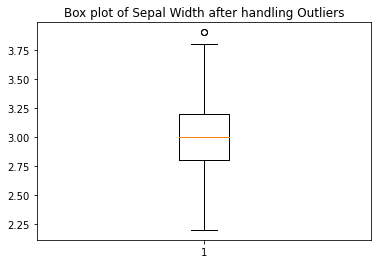

In [24]:
# Re-Checking the Sepal_width column after handling the outliers
plt.boxplot(data['Sepal_width'])
plt.title('Box plot of Sepal Width after handling Outliers')
plt.show()

In [25]:
data['Sepal_width'].describe()

count    150.000000
mean       3.022667
std        0.368043
min        2.200000
25%        2.800000
50%        3.000000
75%        3.200000
max        3.900000
Name: Sepal_width, dtype: float64

We see there is a significant drop in the outliers, and the mean and median are really close and we reduced the standard deviation.

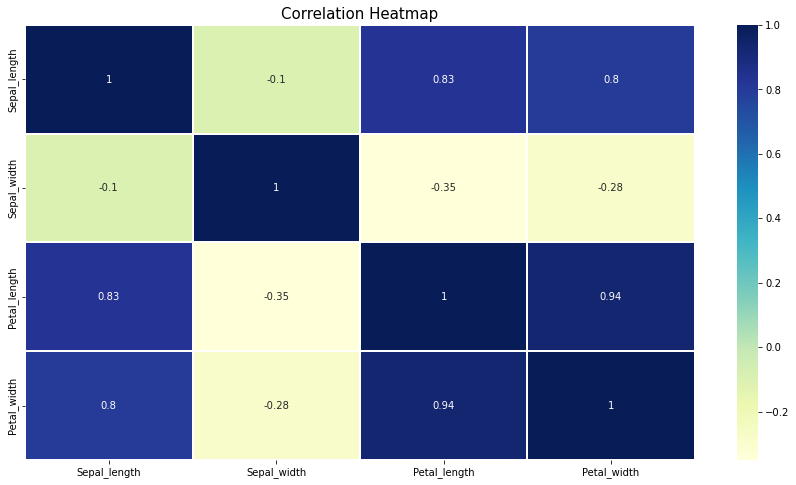

In [26]:
# Feature selection (pre-processing step)
plt.subplots(figsize=(15,8))
sns.heatmap(data.corr(),vmin = -0.35, vmax = 1, annot = True, linewidth = .2, cmap='YlGnBu')
plt.title('Correlation Heatmap',fontsize =15)
plt.show()

We see that 'Petel_length' and 'Petel_width' are highly correlated and 'Sepal_width' and 'Petel_length' are least correlatd

However, we will consider all features because, only 4 features are present in the data set.

In [27]:
# Spliting the data set into input and target variables(pre-processing step)

In [28]:
# Making 'Classification' as target variable(dependent) and rest as input variables(independent)
X = data.drop(['Classification'], axis = 1 )
y = data['Classification']

In [29]:
# Do Label encoding to change the target values (pre-processing step)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() 
y = label_encoder.fit_transform(y)

In [30]:
# Now we will create train and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [31]:
# Note: We are not performing any scaling for the input variables, because we know they are all in same scale (Centimetres).

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

A classification model tries to draw some conclusion from the input values given for training. It will predict the class labels/categories for the new data.

Some of the common types of classification algorithms are: Logistic Regression, K-Nearest Neighbours, Support Vector Machine, Decision Tree, and Random Forest.

The main steps involved in building a classification model:

Initialize the classifier.
Train the classifier.
Predict the target.
Evaluate the classification model.

#### Building the various Classification models

In [32]:
# importing alll the necessary libraries to use in various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K Nearest Neighbours
from sklearn.svm import SVC # for Support Vector Machine (SVM) Classifier Algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.ensemble import RandomForestClassifier #for using Random Forest Algoithm

from sklearn import metrics #for checking the model accuracy

#### 1. Logistic Regression 

Logistic regression is a machine learning algorithm for classification.

In [33]:
model = LogisticRegression(max_iter = 127) # Select the algorithm and initialize
model.fit(X_train,y_train) # Then train the algorithm with the training data and the training output
prediction = model.predict(X_test) # Now we will pass the testing data to the trained algorithm

# Finally we check the accuracy of the algorithm. 
print('The accuracy of the Logistic Regression is','%.2f'%(metrics.accuracy_score(y_test, prediction)*100),'%')
print('\nThe classification summary of the Precision, Recall, F1 score for each class:\n',metrics.classification_report(y_test, prediction))

The accuracy of the Logistic Regression is 97.78 %

The classification summary of the Precision, Recall, F1 score for each class:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Description:

0 : Iris-setosa , 1 : Iris-versicolor , 2 : Iris-virginica

Accuracy is a ratio of correctly predicted observation to the total observations.
F1-Score is the weighted average of Precision and Recall used in all types of classification algorithms. Therefore, this score takes both false positives and false negatives into account.
F1-Score is usually more useful than accuracy.
Precision: When a positive value is predicted, how often is the prediction correct.
Recall: When the actual value is positive, how often is the prediction correct.

#### 2. K-Nearest Neighbours(KNN)

Neighbours based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point.

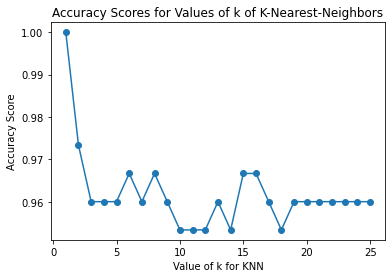

In [34]:
# Experimenting with different k values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores,marker="o")
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of K-Nearest-Neighbors')
plt.show()

In [35]:
# For this particular dataset, we obtain the highest accuracy when k=15.
model = KNeighborsClassifier(n_neighbors=15) # this examines 15 neighbours for putting the new data into a class
model.fit(X_train,y_train)
prediction = model.predict(X_test)

print('The accuracy of the KNN is','%.2f'%(metrics.accuracy_score(y_test, prediction)*100),'%')
print('\nThe classification summary of the Precision, Recall, F1 score for each class:\n',metrics.classification_report(y_test, prediction))

The accuracy of the KNN is 97.78 %

The classification summary of the Precision, Recall, F1 score for each class:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### 3. Support Vector Machine (SVM)

Support vector machine is a representation of the training data as points in space separated into categories by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In [36]:
model = SVC(kernel = 'rbf') 
model.fit(X_train,y_train) 
prediction = model.predict(X_test) 

print('The accuracy of the SVM is:','%.2f'%(metrics.accuracy_score(y_test, prediction)*100),'%')
print('\nThe classification summary of the Precision, Recall, F1 score for each class:\n',metrics.classification_report(y_test, prediction))

The accuracy of the SVM is: 97.78 %

The classification summary of the Precision, Recall, F1 score for each class:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### 4. Decision Tree

Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.

In [37]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

print('The accuracy of the Decision Tree is','%.2f'%(metrics.accuracy_score(y_test, prediction)*100),'%')
print('\nThe classification summary of the Precision, Recall, F1 score for each class:\n',metrics.classification_report(y_test, prediction))

The accuracy of the Decision Tree is 100.00 %

The classification summary of the Precision, Recall, F1 score for each class:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### 5. Creating a Random Forest algorithm

Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.

In [38]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('The accuracy of the Random Forest model is','%.2f'%(metrics.accuracy_score(y_test, prediction)*100),'%')
print('\nThe classification summary of the Precision, Recall, F1 score for each class:\n',metrics.classification_report(y_test, prediction))

The accuracy of the Random Forest model is 100.00 %

The classification summary of the Precision, Recall, F1 score for each class:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [39]:
# Evaluate the importance of features using Random Forest Classifier
pd.DataFrame(model.feature_importances_ , index =X.columns, columns = [ 'Feature Importance']).sort_values(by='Feature Importance',ascending=False)*100

,Feature Importance
Petal_width,50.902691
Petal_length,37.555261
Sepal_length,7.178672
Sepal_width,4.363376


We see that Petal_width and Petal_length are the important features and with them itself we can predict the target variable.

#### Comparing the Accuracy and F1 scores of diffrent models

In [40]:
score = pd.DataFrame({'Model' : ['Logistic Regression', 'K-Nearest Neighbours', 'Support Vector Machine', 'Decision Tree', 'Random Forest'],
'Accuracy' : ['97.78 %' , '97.78 %', '97.78 %', '100.00 %', '100.00 %' ],
'F1-score' : ['0.98','0.98','0.98','1','1']})
score.style.hide_index()

Model,Accuracy,F1-score
Logistic Regression,97.78 %,0.98
K-Nearest Neighbours,97.78 %,0.98
Support Vector Machine,97.78 %,0.98
Decision Tree,100.00 %,1
Random Forest,100.00 %,1


From the above table, we can see that all the models are good and from those Decision Tree and Decision Tree models are the best models for this data set.